<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Ход-проекта" data-toc-modified-id="Ход-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ход проекта</a></span><ul class="toc-item"><li><span><a href="#Импортирование-библиотек-и-знакомство-с-данными" data-toc-modified-id="Импортирование-библиотек-и-знакомство-с-данными-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импортирование библиотек и знакомство с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Разделение данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Проверка-качества-модели-на-тестовых-данных" data-toc-modified-id="Проверка-качества-модели-на-тестовых-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проверка качества модели на тестовых данных</a></span></li><li><span><a href="#Sanity-check" data-toc-modified-id="Sanity-check-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Sanity check</a></span><ul class="toc-item"><li><span><a href="#Сравнение-со-случайной-моделью" data-toc-modified-id="Сравнение-со-случайной-моделью-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Сравнение со случайной моделью</a></span></li><li><span><a href="#Сравнение-с-константной-моделью" data-toc-modified-id="Сравнение-с-константной-моделью-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Сравнение с константной моделью</a></span></li><li><span><a href="#Другие-метрики-классификации" data-toc-modified-id="Другие-метрики-классификации-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Другие метрики классификации</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Описание проекта

##### Построение системы рекомендации тарифного плана

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
  
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф.
  
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75.

# Ход проекта

## Импортирование библиотек и знакомство с данными

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
try: 
    data = pd.read_csv('/datasets/users_behavior.csv')
except FileNotFoundError:
    data = pd.read_csv('users_behavior.csv')

In [3]:
data.sample(10)

,calls,minutes,messages,mb_used,is_ultra
2100,22.0,173.96,14.0,24725.93,0
342,23.0,145.75,21.0,11655.67,0
2742,52.0,314.15,15.0,2450.04,1
2599,34.0,217.72,63.0,23026.36,0
1547,61.0,389.23,62.0,14661.64,0
1691,64.0,496.59,21.0,11136.10,0
366,64.0,353.85,36.0,17413.75,0
2275,58.0,395.81,77.0,25859.09,0
57,91.0,585.09,49.0,27339.85,1
76,73.0,633.22,21.0,18421.17,0


## Предобработка данных

❗️Согласно тех. заданию, предобработка данных уже была выполнена. Однако, лучше это проверить

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


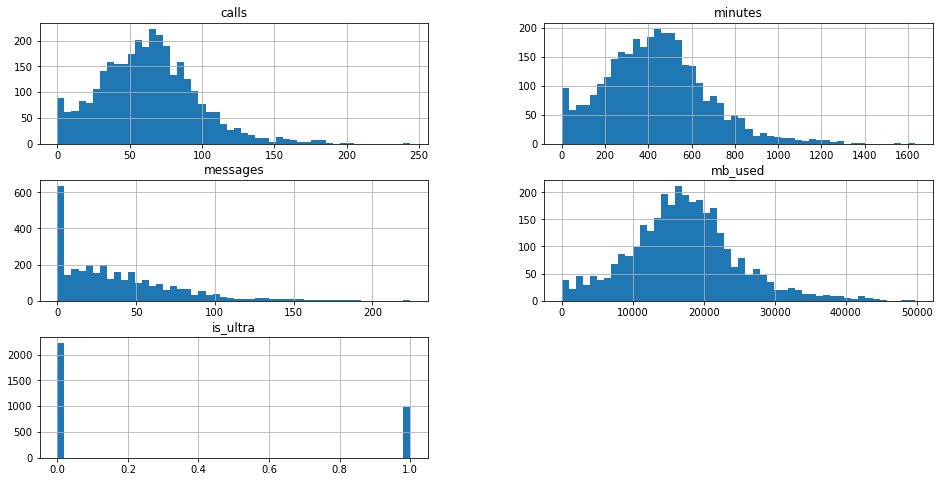

In [5]:
data.hist(figsize=(16,8), bins=50)
plt.show()

In [6]:
f'Кол-во дубликатов: {data.duplicated().sum()}'

'Кол-во дубликатов: 0'

❗️Данные предобработаны просто изумительно!

## Разделение данных

❗️В качестве схемы разбиения возьмем пропорцию 3:1:1 на обучение, валидацию и тест соответсвенно

In [7]:
features = data.drop('is_ultra', axis=1)
target = data['is_ultra']

In [8]:
(features_model, features_test, 
    target_model, target_test) = train_test_split(features, target, test_size=0.2, random_state=2036)

In [9]:
(features_train, features_valid,
    target_train, target_valid) = train_test_split(features_model, target_model, test_size=0.25, random_state=2036)

In [10]:
print(f'Размерность фич обучающей выборки: {features_train.shape}')
print(f'Размерность фич валидационной выборки: {features_valid.shape}')
print(f'Размерность фич тестовой выборки: {features_test.shape}')

Размерность фич обучающей выборки: (1928, 4)
Размерность фич валидационной выборки: (643, 4)
Размерность фич тестовой выборки: (643, 4)


## Обучение модели

Так как исходная задача относится к классу задач классификации, попробуеем обучить три модели: дерево решений, случайный лес и логистическую регрессию, чтобы выбрать наилучшую.

### Дерево решений

❗️Выберем лучшее дерво из деревьев глубиной до 15

In [11]:
best_tree_model = None
best_tree_accuracy = 0
max_depth = 15
for depth in range(1, max_depth+1):
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=2036)
    tree_model.fit(features_train, target_train)
    accuracy = tree_model.score(features_valid, target_valid)
    
    if accuracy > best_tree_accuracy:
        best_tree_model = tree_model
        best_tree_accuracy = accuracy

In [12]:
print(f'Лучшее глубина дерева: {best_tree_model.max_depth} с долей правильных ответов: {best_tree_accuracy}')

Лучшее глубина дерева: 9 с долей правильных ответов: 0.8102643856920684


### Случайный лес

❗️Выберем лучший лес максимум из 15 деревьев глубиной до 15

In [13]:
best_forest_model = None
best_forest_accuracy = 0
max_estimators = 15
max_depth = 15

for est in range(1, max_estimators+1):
    for depth in range(1, max_depth):
        model_forest = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=2036)
        model_forest.fit(features_train, target_train)
        accuracy = model_forest.score(features_valid, target_valid)
        
        if accuracy > best_forest_accuracy:
            best_forest_model = model_forest
            best_forest_accuracy = accuracy

In [14]:
print(f'Лучший случайный лес из {best_forest_model.n_estimators} деревьев с максимальной глубиной дерева ' + 
      f'{best_forest_model.max_depth} показал долю правильных ответов: {best_forest_accuracy}')

Лучший случайный лес из 15 деревьев с максимальной глубиной дерева 11 показал долю правильных ответов: 0.8304821150855366


### Логистическая регрессия

In [15]:
model_log = LogisticRegression(random_state=2036)
model_log.fit(features_train, target_train)
log_accuracy = model_log.score(features_valid, target_valid)

print("Доля правильных ответов модели логистической регрессии на валидационной выборке:", log_accuracy)

Доля правильных ответов модели логистической регрессии на валидационной выборке: 0.7169517884914464


### Выбор лучшей модели

❗️Выберем лучшую модель на основе их точности на валидационных данных

In [16]:
print(f'DecisionTreeClassifier: {best_tree_accuracy}')
print(f'RandomForestClassifier: {best_forest_accuracy}')
print(f'LogisticClassifier: {log_accuracy}')

DecisionTreeClassifier: 0.8102643856920684
RandomForestClassifier: 0.8304821150855366
LogisticClassifier: 0.7169517884914464


❗️Логистическая регрессия не проявила себя, а вот случайный лес и дерево реешений выдали близкие и весьма неплохиее результаты. Но несмотря близость результатов, выберем случайный лес, как более точный алгоритм ввиду отсутствия нужды гнаться за оптимизацией времени работы алгоритма. В нашем случае точность важнее

## Проверка качества модели на тестовых данных

In [17]:
test_forest_accuracy = best_forest_model.score(features_test, target_test)
print("Доля правильных ответов модели случайного леса на тестовой выборке:", test_forest_accuracy)

Доля правильных ответов модели случайного леса на тестовой выборке: 0.8180404354587869


❗️Недурно, весьма недурно! И даже обошлось без переобучения (по крайней мере, ярко-выраженного)

## Sanity check

### Сравнение со случайной моделью

Очевидно, что наша модель круче случайной (accuracy=0.5 < accuracy=0.81)

### Сравнение с константной моделью

In [18]:
one = data[data['is_ultra']==1].shape[0] / data.shape[0]
zero = data[data['is_ultra']==0].shape[0] / data.shape[0]
print('Доля значений нулевого класса: {:.2f}'.format(zero))
print('Доля значений первого класса: {:.2f}'.format(one))

Доля значений нулевого класса: 0.69
Доля значений первого класса: 0.31


Однако, если бы наша модель всегда выдавала бОльший класс (то бишь нулевой), accuracy такой модели было бы 0.69, но наша модель все равно выигрывает 😎

### Другие метрики классификации

In [19]:
predictions = best_forest_model.predict(features_test)

precision = precision_score(target_test, predictions)
recall = recall_score(target_test, predictions)
f1_score = f1_score(target_test, predictions)

print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')

precision: 0.8359375
recall: 0.5270935960591133
f1_score: 0.6465256797583081


❗️А вот с более солидными метриками не все так радужно. Точность неплохая, но вот полнота оставляет желать лучшего. В половине случаев не предлагать пользователям тариф ultra, где это возможно, и терять часть средств - совсем непривлекатеельная идея (но по прежнему лучше констатной модели)

# Общий вывод

В ходе проделанной работы удалось построить несколько моделей классификации с разными гиперпараметрами и выбрать лучшую из них: случайный лес, на основе которого предлагается строить рекомендательную систему компании Мегалайн. Не все метрики качества говорят о том, что модель получилась идеальной, однако, она отрабатывает явно лучше константной и сможет принести дополнительную ценность для бизнеса